In [1]:
from gait_analysis import CasiaDataset, settings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from torch.utils.data import DataLoader

warnings.filterwarnings('ignore')

# Loading the dataset

We can change the quickly the indexing to access all the angles

In [2]:
from gait_analysis.Config import Config
c = Config()
c.config['indexing']['grouping'] = 'person_sequence_angle'
c.config['pose']['load'] = True
c.config['flow']['load'] = True
c.config['heatmaps']['load'] = True
# c.config['transformers']['Rescale']['target'] = ["heatmaps"]

loading configuration  default


Plain and untransformed dataset

In [3]:
dataset_3 = CasiaDataset()

In [4]:
item = dataset_3[1]
annotations = item['annotations']
scenes = item['scenes']
poses = item['poses']
flows = item['flows']

print(item.keys())

dict_keys(['scenes', 'flows', 'heatmaps'])


# Using the composer to construct reusable transformers

In [5]:
from gait_analysis import Composer

composer = Composer()
transformer = composer.compose()
print(transformer)

heatmaps are a list of lists:
<class 'list'>
<class 'list'>
with total number of elements: 
52  lists per frames
2  lists per frames, meaning heatmaps per frame
these come from the configuration:
['LAnkle', 'RAnkle']
Plotting the first element.


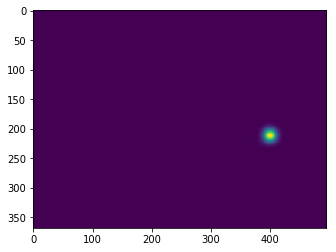

In [6]:
heatmaps = item['heatmaps']
print('heatmaps are a list of lists:')
print(type(heatmaps))
print(type(heatmaps[0]))
print('with total number of elements: ')
print(len(heatmaps),' lists per frames')
print(len(heatmaps[0]),' lists per frames, meaning heatmaps per frame')
print('these come from the configuration:')
print(c.config['heatmaps']['body_keypoints_include_list'])
print('Plotting the first element.')
plt.imshow(item['heatmaps'][0][0])

In [7]:
print(c.get_indexing_grouping())
test_item = dataset_3[0]
transformed_item = transformer(test_item)
print('==> transformed item is: ',test_item.keys())

person_sequence_angle


TypeError: tuple indices must be integers or slices, not str

In [ ]:
item.keys()

Printing some samples of the transformed dataset

In [ ]:
transformed_dataset = CasiaDataset(transform=transformer)

for i in range(len(transformed_dataset)):
    print('i: ', i)
    sample = transformed_dataset[i]

    print(i, sample.keys())
    print(sample['annotations'].size())

    if i == 5:
        break

In [ ]:
sample['annotations']

## Dataloader 

In [ ]:
# dataloader = DataLoader(transformed_dataset, batch_size=4,
#                         shuffle=True, num_workers=4)
dataloader = DataLoader(transformed_dataset, batch_size=4)

In [ ]:
for i_batch, sample_batched in enumerate(dataloader):
    # observe 4th batch and stop.
    if i_batch == 3:
        print(type(sample_batched))
        break

# DEV: The problem is that the dimensions of the label are different for some of the videos